In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/boston.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
X = df.drop('PRICE',axis=1)
X.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
y = df['PRICE']
y.head()

,PRICE
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


# 원-핫 인코딩

In [26]:
Y = pd.get_dummies(y).values

# 딥러닝 입력을 위해 데이터프레임을 Numpy로 변환

In [27]:
X = X.values

# 딥러닝 시작

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((16512, 9), (16512, 3842), (4128, 9), (4128, 3842))

# Sequential 모델 생성

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(9,),activation='relu')) # input_shape 숫자를 컬럼의 개수와 맞추지 않으면 오류 발생
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 8)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,311 (5.12 KB)

 Trainable params: 1,311 (5.12 KB)

 Non-trainable params: 0 (0.00 B)

# 모델에 fit

In [31]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6899.5669 - mse: 6899.5669 - val_loss: 6.8384 - val_mse: 6.8384
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 106.7679 - mse: 106.7679 - val_loss: 7.9726 - val_mse: 7.9726
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21.4659 - mse: 21.4659 - val_loss: 1.9744 - val_mse: 1.9744
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2843 - mse: 3.2843 - val_loss: 0.0925 - val_mse: 0.0925
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5015 - mse: 0.5015 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0975 - mse: 0.0975 - val_loss: 0.0801 - val_mse: 0.0801
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1242 - mse: 0.1242 - val_loss: 0.0581 - val_mse: 0.0581
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3

# loss 체크

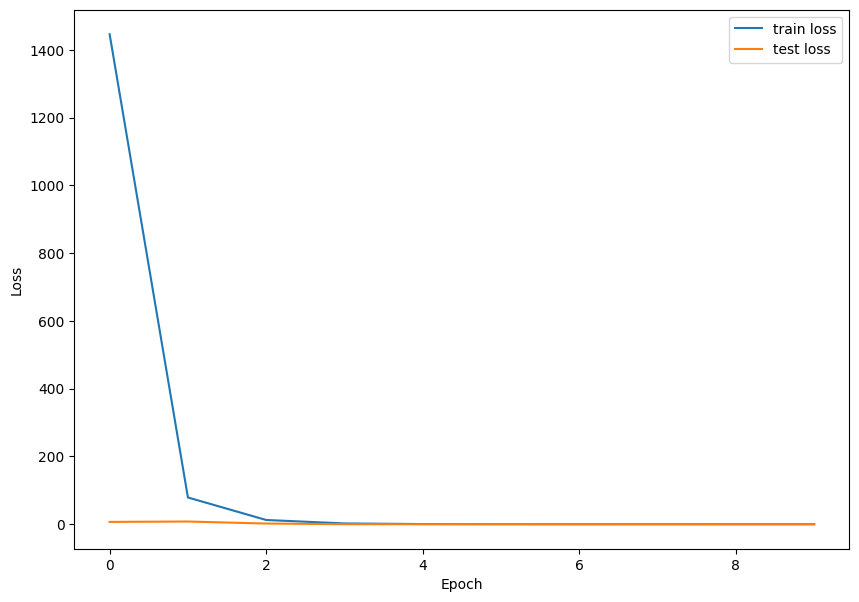

In [32]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 평가

In [33]:
model.evaluate(X_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7163e-04 - mse: 8.7163e-04


[0.0016429167008027434, 0.0016429167008027434]